<a href="https://colab.research.google.com/github/awildt01/Airbnb_Berlin-/blob/main/Analisando_os_Dados_do_Airbnb_(Berlin_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Berlin

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlin, e ver quais insights podem ser extraídos a partir de dados brutos.**

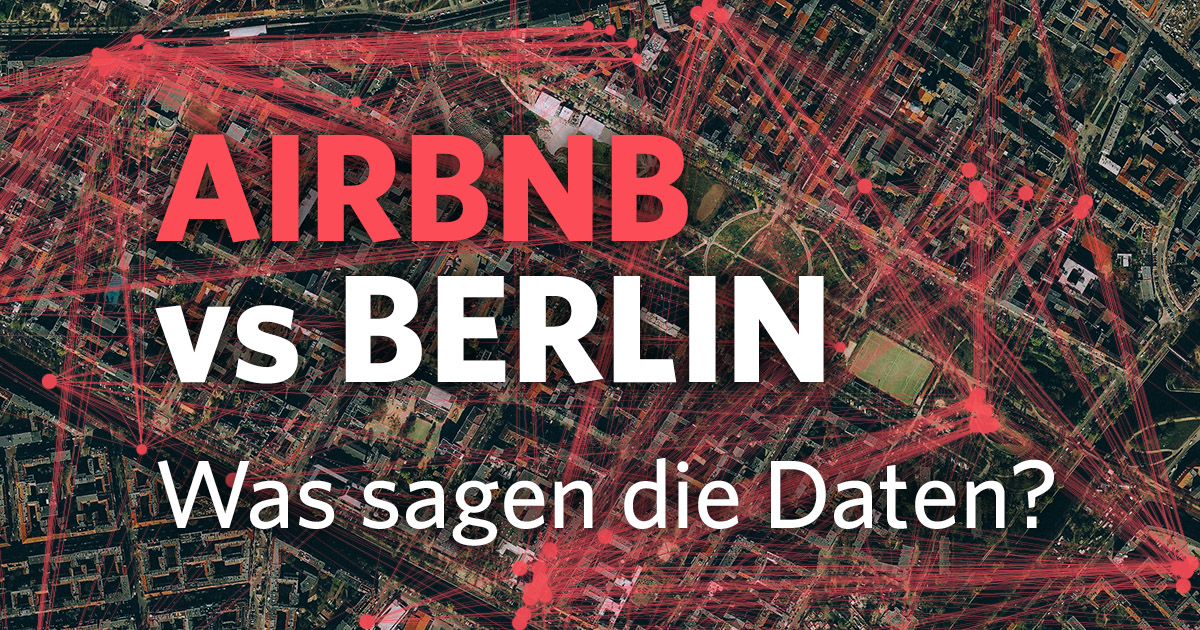





In [ ]:
# importar os pacotes necessarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
from folium import plugins
import folium
warnings.filterwarnings("ignore")

%matplotlib inline



In [ ]:
# importar o arquivo listings.csv para um DataFrame
data = "/content/listings.csv"

df_berlin = pd.read_csv(data)

## Análise dos Dados
Esta etapa tem como objetivo criar uma consciência situacional inicial e possibilitar a compreensão da estrutura dos dados."


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - nome do bairro.
* `neighbourhood` -  O grupo de vizinhanças dentro do bairro. são geocodificado usando a latitude e longitude em relação às vizinhanças.
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - O número de avaliações que a listagem recebeu (nos últimos 12 meses)
* `license` - as licenças são exigidas por lei para determinados aluguéis de curto prazo.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df_berlin.head(1)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,83,63,148,2023-05-25,0.87,1,80,1,First name and Last name: Nicolas Krotz Conta...


In [ ]:
# mostrar as 5 ultimas entradas
df_berlin.tail(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
12471,918888704662383953,Rental unit in Berlin · ★New · 1 bedroom · 1 b...,1170958,Denizcan,Tempelhof - Schöneberg,Tempelhof,52.456304,13.38445,Entire home/apt,54,92,0,NaN,NaN,1,364,0,NaN


In [ ]:
# Info sobre o Datenset
df_berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12472 entries, 0 to 12471
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12472 non-null  int64  
 1   name                            12472 non-null  object 
 2   host_id                         12472 non-null  int64  
 3   host_name                       12462 non-null  object 
 4   neighbourhood_group             12472 non-null  object 
 5   neighbourhood                   12472 non-null  object 
 6   latitude                        12472 non-null  float64
 7   longitude                       12472 non-null  float64
 8   room_type                       12472 non-null  object 
 9   price                           12472 non-null  int64  
 10  minimum_nights                  12472 non-null  int64  
 11  number_of_reviews               12472 non-null  int64  
 12  last_review                     

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

- Os dados têm 12.472 linhas e 18 colunas.
- Existem apenas 2 tipos de variáveis: "object" e "float". No entanto, as  variáveis "neighbourhood," "neighbourhood_group," e "room_type" poderão ser tratadas no futuro como categóricas.
- "last_review" é do tipo "Datetime."
- Berlim possui 12 bairros.-


In [ ]:
# identificar o volume de dados do DataFrame
print('{} Entrada'.format(df_berlin.shape[0]))
print('{} Variaveis'.format(df_berlin.shape[1]))
print('--------')
# verificar as 5 daten typ entradas do dataset
display(df_berlin.dtypes)
print('--------')

print('Tipos de Room em Berlin:')
lista = df_berlin.room_type.unique()
for room in lista:
  print(room)
print('--------')
print('Nr Lugares dentro dos bairros ou pequenos Bairros: {}'.format(len(df_berlin.neighbourhood.unique())))
print('--------')
print('Nr Bairros: {}'.format(len(df_berlin.neighbourhood_group.unique())))



12472 Entrada
18 Variaveis
--------


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

--------
Tipos de Room em Berlin:
Entire home/apt
Private room
Shared room
Hotel room
--------
Nr Lugares dentro dos bairros ou pequenos Bairros: 136
--------
Nr Bairros: 12


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

"A qualidade de um **dataset** está diretamente relacionada à quantidade de valores ausentes. É importante entender desde o início se esses valores nulos são significativos em comparação com o total de entradas.

- É possível observar que a coluna "License" possui 53% de seus valores faltantes.
- As variáveis "reviews_per_month" e "last_review" possuem valores nulos em 19%.
- A variável "host_name" possui aproximadamente 0,08% dos valores nulos."

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
total_valoresfaltantes = sum(df_berlin.isnull().sum())
total_valores = df_berlin.shape[0] * 18
print('Total de falores Faltandes {}'.format(sum(df_berlin.isnull().sum())))
print('Porcentagen de valores faltantes ao total {:.2f} %'.format(total_valoresfaltantes / total_valores *100) )
print('')
print('Valores Faltantes por coluna ')
print('')
print(df_berlin.isnull().sum().sort_values(ascending=False))
print(' ')
print('Valores Faltantes por coluna en %')
print(' ')
print('{}%'.format((df_berlin.isnull().sum() / df_berlin.shape[0]*100).sort_values(ascending=False)))
print('')


Total de falores Faltandes 11382
Porcentagen de valores faltantes ao total 5.07 %

Valores Faltantes por coluna 

license                           6630
reviews_per_month                 2371
last_review                       2371
host_name                           10
minimum_nights                       0
number_of_reviews_ltm                0
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
id                                   0
name                                 0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
neighbourhood_group                  0
host_id                              0
price                                0
dtype: int64
 
Valores Faltantes por coluna en %
 
license                           53.159076
reviews_per_month                 19.010584
last_review                       19.010584
h

Heatmap dos Falores Faltandes


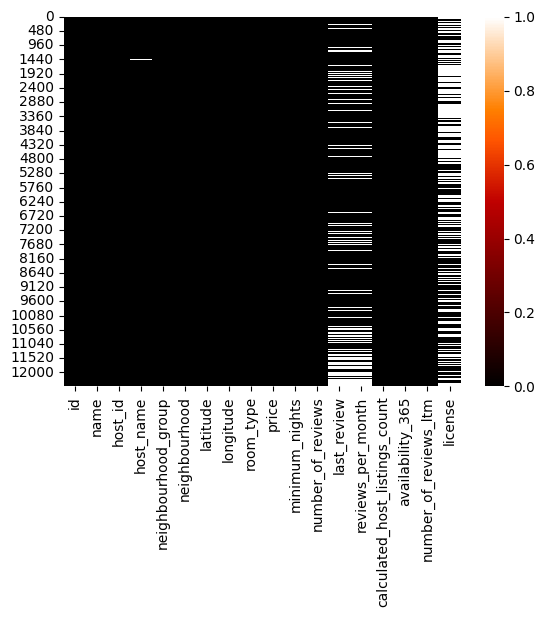

In [ ]:

print('Heatmap dos Falores Faltandes')
sns.heatmap(df_berlin.isnull(),cmap='gist_heat');

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

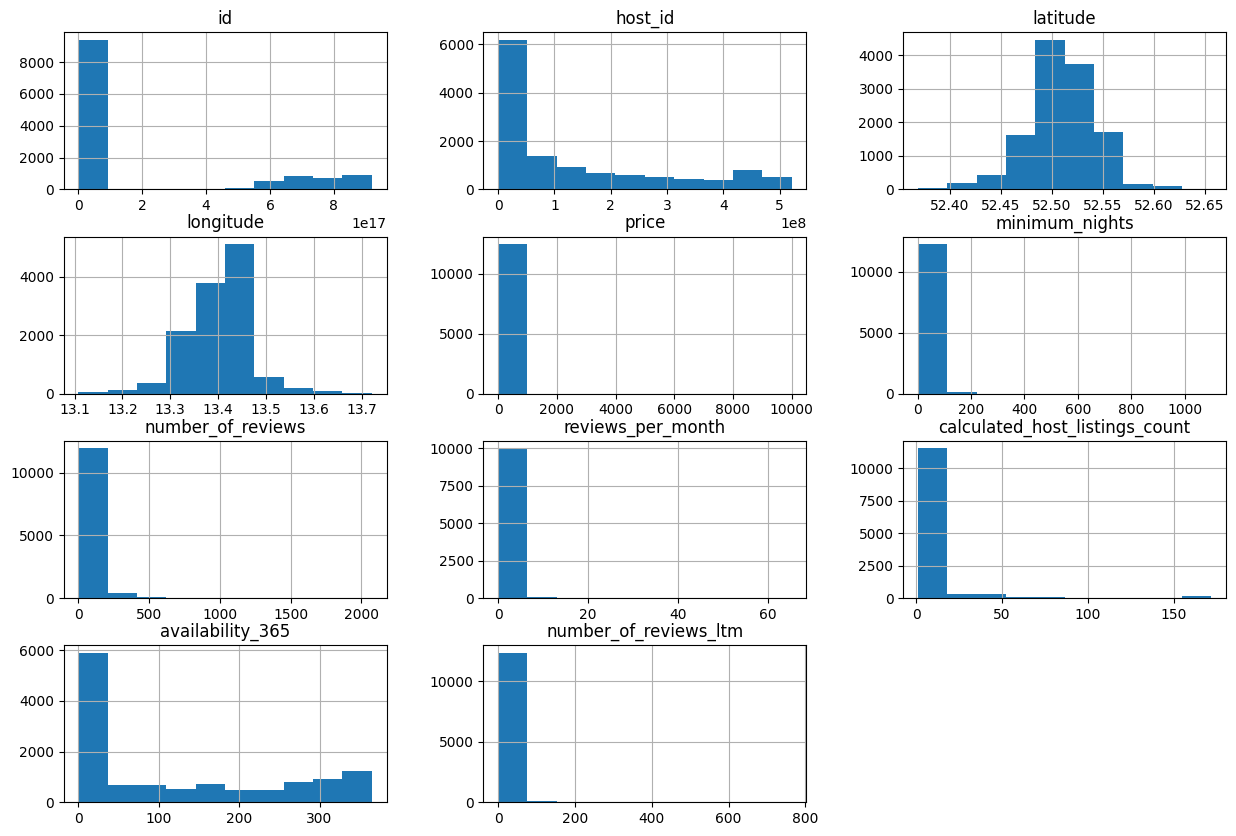

In [ ]:
# plotar o histograma das variáveis numéricas
df_berlin.hist(figsize=(15,10));



### **Q4. Há *outliers* presentes?**

#### **Por que você deveria se preocupar com valores discrepantes?** ####

* Manter valores discrepantes em seu conjunto de dados pode fazer com que seu modelo fique superajustado (muito preciso).

* A remoção de todos os valores discrepantes pode resultar na generalização excessiva do seu modelo (ele não terá um bom desempenho em nada incomum). Como sempre, é melhor experimentar iterativamente para encontrar a melhor maneira de lidar com valores discrepantes.

"Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Veja, por exemplo, as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar essa suspeita, existem duas maneiras rápidas que auxiliam na detecção de outliers. São elas:

- Resumo estatístico por meio do método "describe()".
- Plotagem de boxplots para a variável."


In [ ]:
# ver o resumo estatístico das variáveis numéricas
# print(df.dtypes)
df_berlin[['price','minimum_nights',
  'number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,12472.000000,12472.000000,12472.000000,10101.000000,12472.000000,12472.000000,12472.000000
mean,115.166774,44.695157,36.575609,1.121521,7.149615,117.180244,9.580420
std,195.676946,54.849129,78.560591,1.858754,22.376246,131.406602,21.436469
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,50.000000,2.000000,1.000000,0.120000,1.000000,0.000000,0.000000
50%,81.000000,7.000000,7.000000,0.480000,1.000000,52.000000,1.000000
75%,140.000000,92.000000,33.000000,1.530000,3.000000,243.000000,10.000000
max,9999.000000,1100.000000,2074.000000,65.330000,172.000000,365.000000,764.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável "price" possui 75% dos valores abaixo de 140, porém seu valor  máximo é de 9.999.
* A variável "price" tem um desvio padrão (std) alto, o que pode indicar a presença de outliers.
* A quantidade máxima de noites ("minimum_nights") está acima de 1.100 dias no ano.
* A mediana de "minimum_nights" é de 7 noites.
* A média da máxima de noites ("minimum_nights") é de 44 noites.
* A variável "availability_365" indica um máximo de 365 dias de disponibilidade. Em Berlim, só é permitido anunciar apartamentos privados por até 90 dias.

#### Boxplot para minimum_nights


<Axes: >

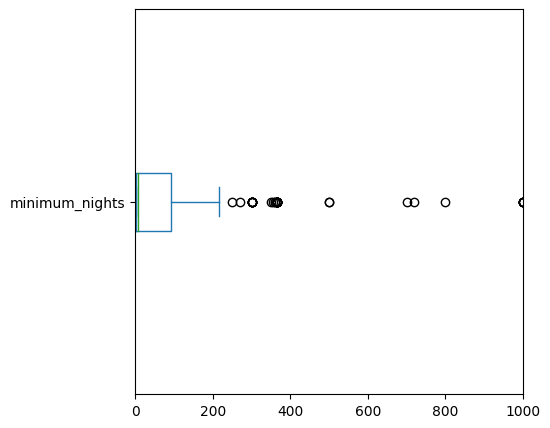

In [ ]:
# df.minimum_nights.plot(kind='box', vert= False,figsize=(5,5), xlim=(0,30))
# plt.show()
df_berlin.minimum_nights.plot(kind='box',vert=False, xlim=(0,1000),figsize=(5,5))

In [ ]:
# minimum_nights
# ver quantidade de valores acima de 30 dias para minimum_nights
#df.minimum_nights.plot(kind='box', vert=False, xlim=(0,30), figsize=(5,5));
print("\nNoites: valores acima 200")
print('Quanditade de Datas apagadas',len(df_berlin[df_berlin.minimum_nights > 200]))
print("{:.4f} % Quantidate apagada en relacao ao todo Dataset".format(len(df_berlin[df_berlin.minimum_nights > 200]) / df_berlin.shape[0] *100))




Noites: valores acima 200
Quanditade de Datas apagadas 41
0.3287 % Quantidate apagada en relacao ao todo Dataset


#### Boxplot para price


price: valores acima de 250
874
7.01%


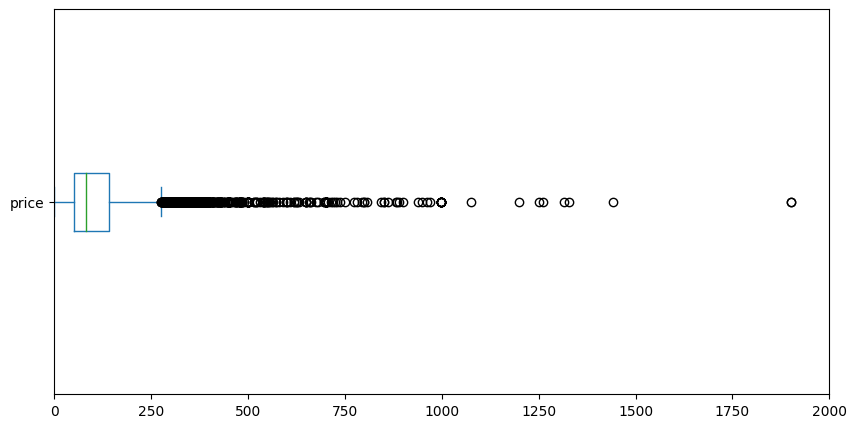

In [ ]:
# df.price.plot(kind='box', vert=False,figsize=(10,5))
# plt.show()
# ver quantidade de valores acima de 1500 para price
df_berlin.price.plot(kind='box', vert=False,figsize=(10,5), xlim=(0,2000))
print("\nprice: valores acima de 250")
print('{}'.format(len(df_berlin[df_berlin.price > 250])))
print('{:.2f}%'.format(len(df_berlin[df_berlin.price > 250]) / df_berlin.shape[0]*100))


## Limpando Outliers

Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.



O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

# IQR = Q3 - Q1

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.

In [ ]:
# remover os *outliers* em um novo DataFrame
# generate count statistics of duplicate entries
# if len(df[df.duplicated()]) > 0:
#     print("No. of duplicated entries: ", len(df[df.duplicated()]))
#     print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
# else:
#     print("No duplicated entries found")

# df.drop_duplicates(inplace=True)

# identificando os outliers para a variável price
q1_price = df_berlin.price.quantile(.25)
q3_price = df_berlin.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)




IQR da variável price:  90.0
Limite superior de price:  275.0
Limite inferior de price:  -85.0


Vamos plotar um boxplot para visualizarmos a diferença feita pela limpeza.

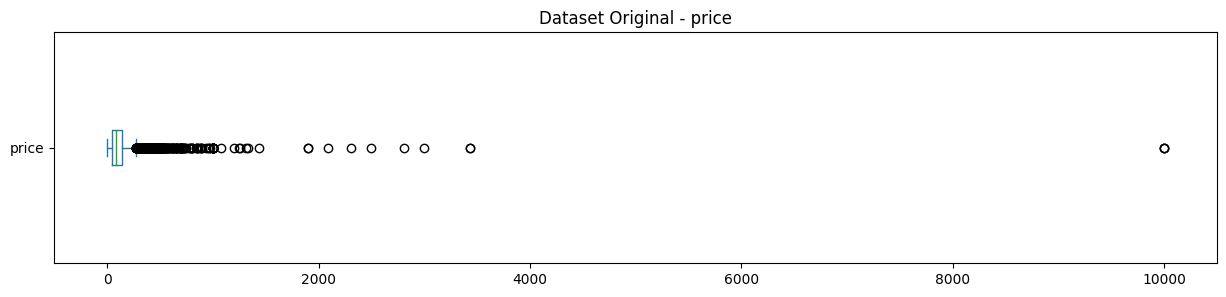

O dataset possui 12472 colunas
683 Entradas acima de 335.5
Representam 5.48% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_berlin.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df_berlin.shape[0]))
print("{} Entradas acima de 335.5".format(len(df_berlin[df_berlin.price > 275])))
print("Representam {:.2f}% do dataset".format((len(df_berlin[df_berlin.price > 275]) / df_berlin.shape[0])*100))

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_berlin.minimum_nights.quantile(.25)
q3_minimum_nights = df_berlin.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  90.0
Limite superior de minimum_nights:  227.0
Limite inferior de minimum_nights:  -133.0


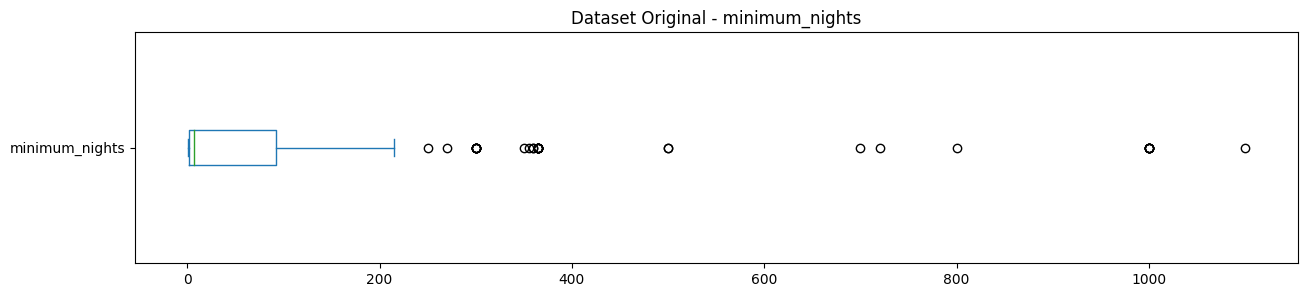

O dataset possui 12472 colunas
37 Entradas acima de 335.5
Representam 0.30% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_berlin.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df_berlin.shape[0]))
print("{} Entradas acima de 335.5".format(len(df_berlin[df_berlin.minimum_nights > 225])))
print("Representam {:.2f}% do dataset".format((len(df_berlin[df_berlin.minimum_nights > 225]) / df_berlin.shape[0])*100))

Shape antes da limpeza:  (12472, 18)
Shape após a limpeza:  (10717, 18)


<Axes: >

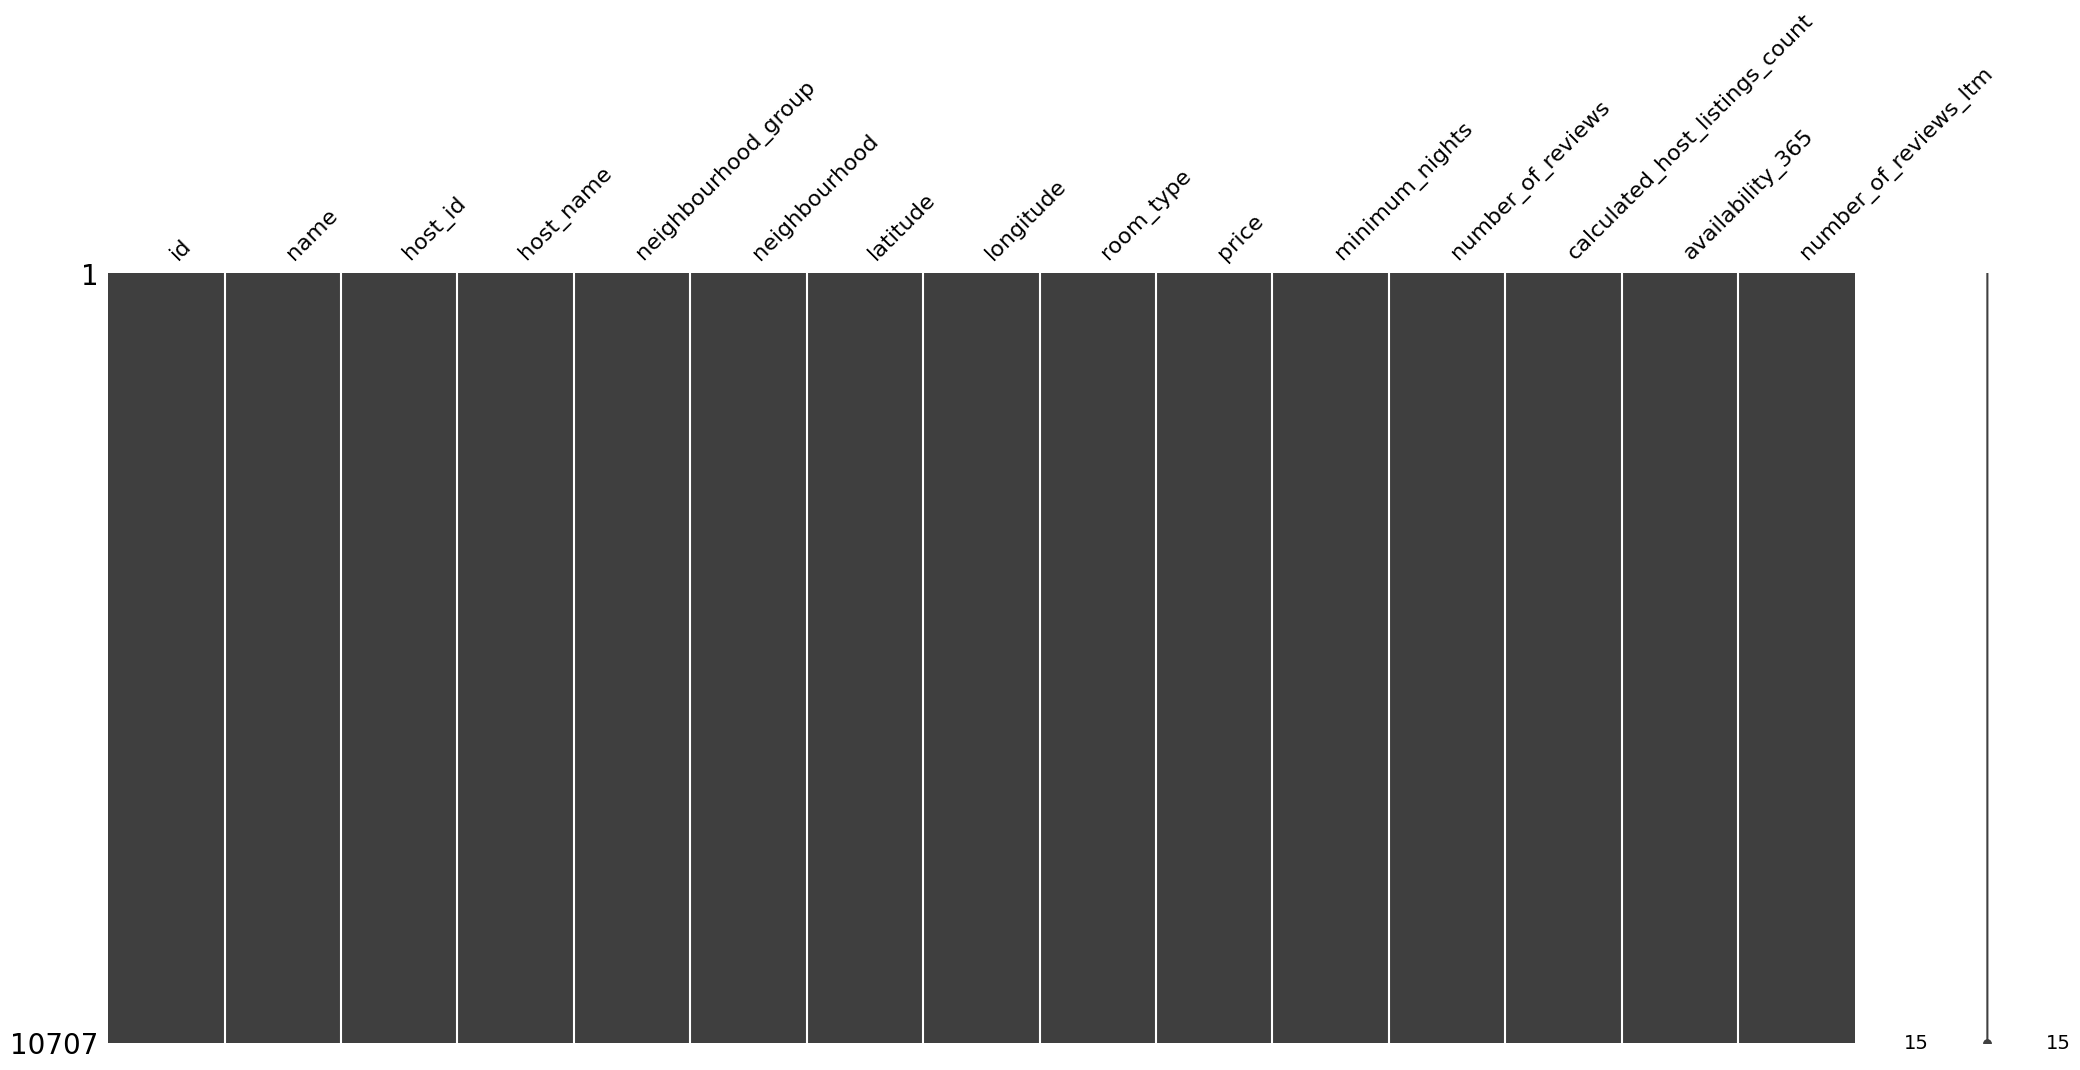

In [ ]:
# colunas e linhas a há serem apagadas
# reviews_per_month                 12.759943
# last_review                       12.759943
#host_name                           10

df_clean = df_berlin.copy()

df_clean.drop(df_clean[df_clean.price > 190].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 225].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df_berlin.shape)
print('Shape após a limpeza: ',df_clean.shape)

# remover as colunas `license`, `reviews_per_month `, `last_review `.
# remover linha  `host_name `.

df_clean.drop('license',axis =1,inplace=True)
df_clean.drop('reviews_per_month',axis =1,inplace=True)
df_clean.drop('last_review',axis =1,inplace=True)

df_clean.dropna(inplace=True)
df_clean.isna().sum()

missingno.matrix(df_clean)

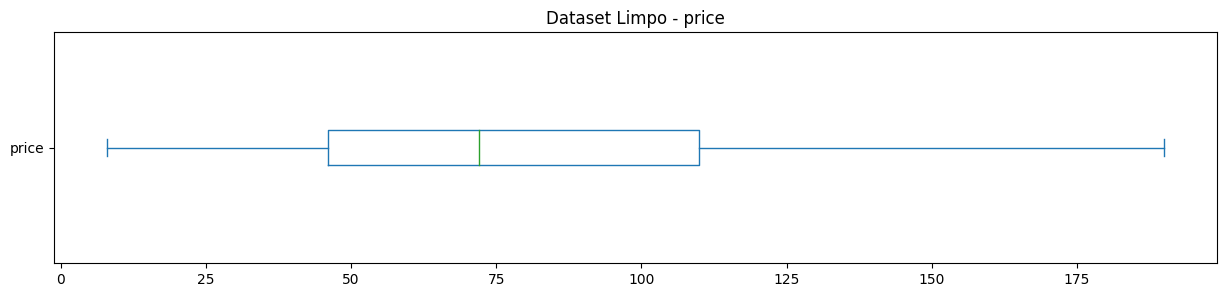

Tamanho original: 12472 colunas
Tamanho atual: 10707 colunas


In [ ]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df_berlin.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

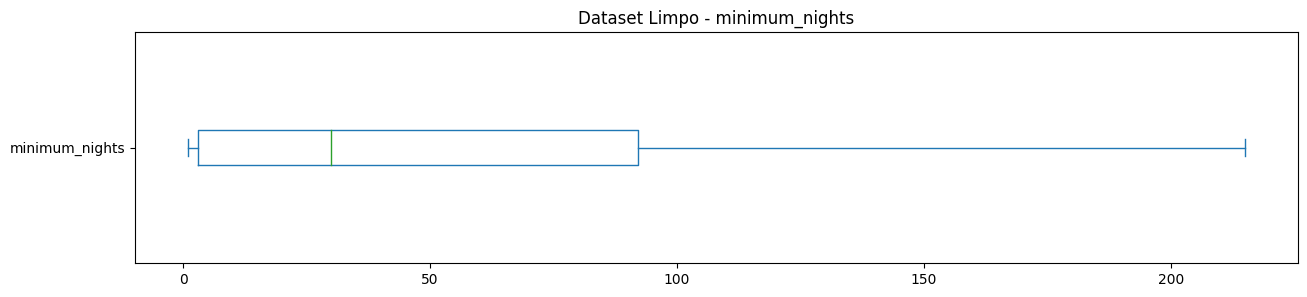

Tamanho original: 12472 colunas
Tamanho atual: 10707 colunas


In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - minimum_nights')
plt.show()
print("Tamanho original: {} colunas".format(df_berlin.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

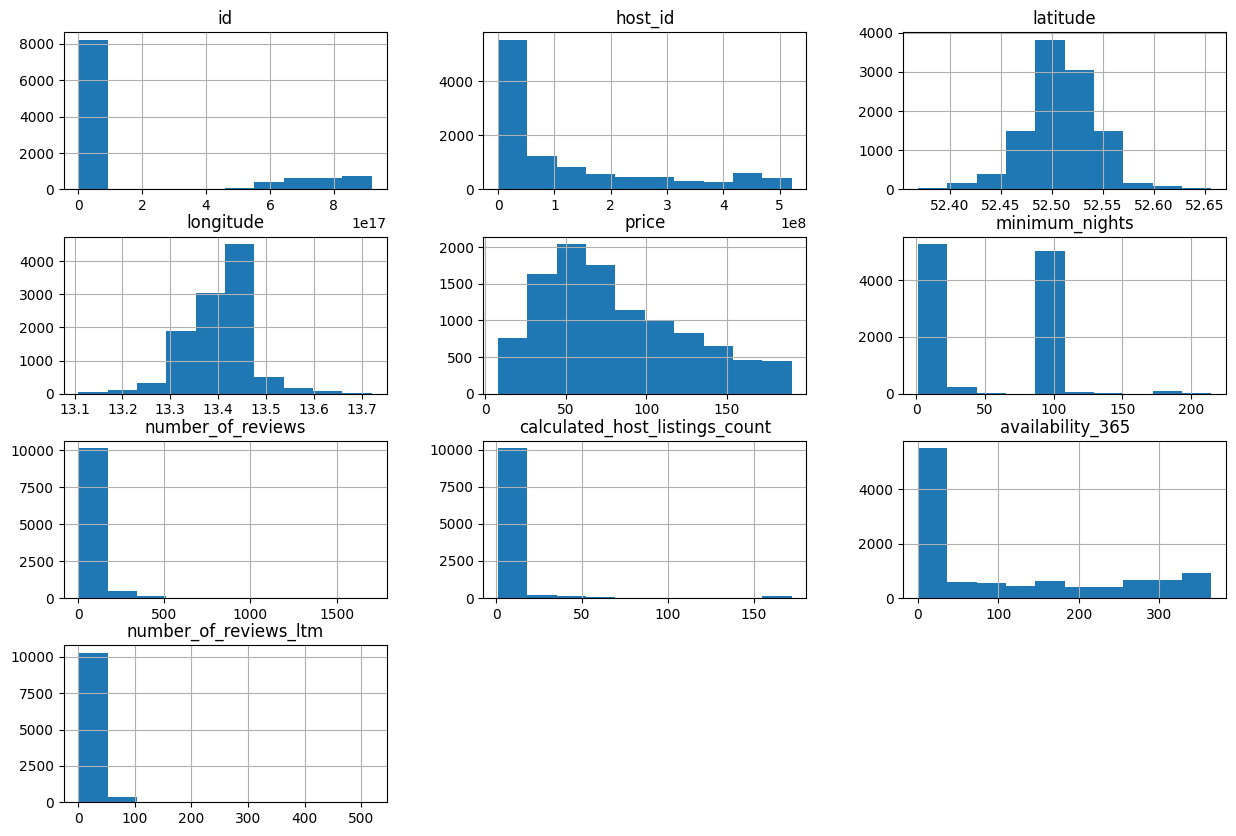

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre  variáveis. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida em função do coeficiente de correlação e vai estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse vou:
* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights',
       'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']].corr()

display(corr)



,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.428332,0.131750,0.161850,0.318704
minimum_nights,-0.428332,1.000000,-0.314324,0.067937,-0.181674
number_of_reviews,0.131750,-0.314324,1.000000,-0.048627,0.138643
calculated_host_listings_count,0.161850,0.067937,-0.048627,1.000000,0.233501
availability_365,0.318704,-0.181674,0.138643,0.233501,1.000000


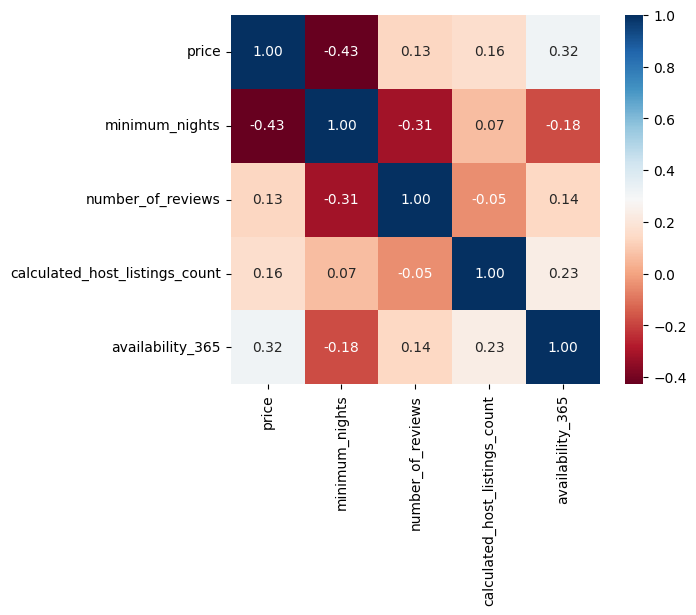

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);
#sns.heatmap(corr, annot=True,cmap='RdBu')




**Por que a multicolinearidade é um problema?**

A multicolinearidade é um problema porque distorce a significância estatística das variáveis ​​independentes.

O objetivo principal da regressão é determinar a relação entre cada variável independente e a variável dependente. Contudo, se as variáveis ​​estiverem **altamente correlacionadas**, poderá já não ser possível determinar exactamente que influência provém de que variável. Isso significa que os valores p dos coeficientes de regressão não podem mais ser interpretados.

Com a multicolinearidade, os coeficientes de regressão podem mudar drasticamente quando os dados mudam ligeiramente ou quando novas variáveis ​​são adicionadas.


* Existe um **correlação  negativa** entre as  variáveis  **'number_of_reviews'** e **'minimum_nights'** assim com entre **'minimum_nights'** e **'price'**


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções:
1. apartamentos/casas inteiras / Entire home/apt
2. apenas o aluguel de um quarto / Private room  
3. dividir o quarto com outras pessoas / Shared room
4. hotel.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
display(df_clean.room_type.value_counts())
# colors = ["purple", "green", "lightblue",'blue']
# df_clean.groupby(by="room_type").count().id.plot(kind="bar", color=colors)

Entire home/apt    6639
Private room       3861
Shared room         144
Hotel room           63
Name: room_type, dtype: int64

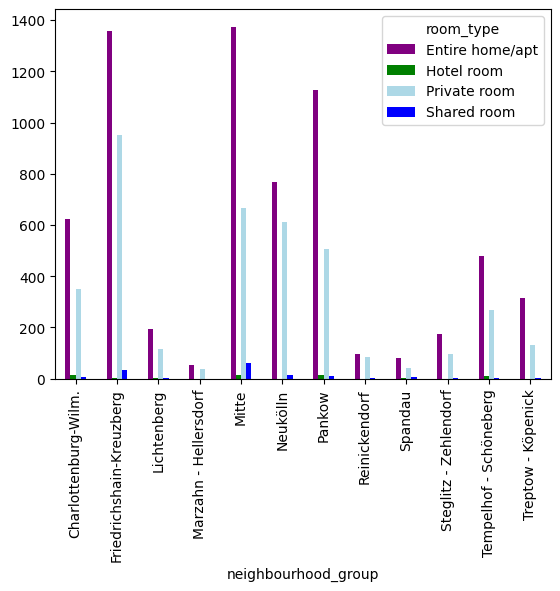

In [ ]:
# Tipos de alugel por Bairros
pd.pivot_table(df_clean, index="neighbourhood_group", columns="room_type", values='id', aggfunc='count').plot(kind = 'bar', color=colors);

room_type
Hotel room         148.904762
Entire home/apt     95.972737
Shared room         60.583333
Private room        55.631184
Name: price, dtype: float64

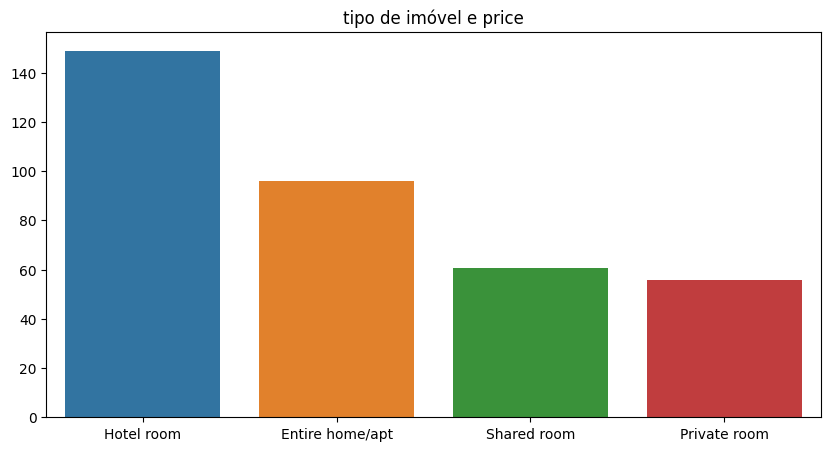

In [ ]:
# tipo de imóvel e price
d = df_clean.groupby('room_type')['price'].mean().sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(x=d.index.tolist(), y=d.values, ax=ax)
ax.set_title('tipo de imóvel e price')
fig.show()
display(d)

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    62.006164
Private room       36.060521
Shared room         1.344915
Hotel room          0.588400
Name: room_type, dtype: float64

In [ ]:
# como os móveis estão distribuidos nos bairros

list_sum_t = df_berlin [['neighbourhood_group', 'room_type']]
two_cls = pd.crosstab(list_sum_t.neighbourhood_group, list_sum_t.room_type)
two_cls

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Charlottenburg-Wilm.,751,29,370,9
Friedrichshain-Kreuzberg,1668,8,978,37
Lichtenberg,219,4,118,2
Marzahn - Hellersdorf,58,0,42,0
Mitte,1889,40,734,68
Neukölln,848,0,623,16
Pankow,1404,24,523,11
Reinickendorf,97,0,86,4
Spandau,89,8,42,5


### **Q6. Qual a média dos preços de aluguel?**

Bairros de Berlin em m²  por price:

1. Mitte (24,26 pro m²),
2. Grunewald (21,14 € pro m²)
3. Charlottenburg (19,21 € pro m²)
4. Moabit (22,76 € pro m²)
5. Marzahn (10,03 € pro m²)
6. Schöneberg (17,09 € pro m²)

"É interessante notar que bairros como Müggelheim e Friedrichshagen têm uma média de preço superior à de lugares como Mitte e Charlottenburg."

O problema è que temos poucas amostras desses Bairros e isso influencia a média.



In [ ]:
display(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False))
# ver quantidade de imóveis no "Marzahn-Süd"
#print(df_clean[df_clean.neighbourhood == "Marzahn-Süd"].shape)
#print(len(df_clean[df_clean.neighbourhood == "Marzahn-Süd"]))
#print(df_clean[df_clean.neighbourhood =="Marzahn-Süd"].shape[0])
#df_clean[df_clean.neighbourhood == "Marzahn-Süd"].shape[0]
# ver as 2 entradas do Complexo do Alemão
print('')
print('Á somente {} imoveis em Müggelheim '.format(len(df_clean[df_clean.neighbourhood == 'Müggelheim'])))
print('')
#df_clean[df_clean.neighbourhood == 'Marzahn-Süd'].head


neighbourhood
Müggelheim                119.333333
Friedrichshagen           109.571429
Siemensstadt              106.400000
Rahnsdorf/Hessenwinkel    106.347826
Alexanderplatz            103.741768
                             ...    
Baumschulenweg             51.236842
Allende-Viertel            48.666667
Köpenick-Süd               45.956522
Marzahn-Mitte              38.200000
Hellersdorf-Süd            20.000000
Name: price, Length: 136, dtype: float64


Á somente 9 imoveis em Marzahn-Süd 



### **Q6. Qual a localidade mais cara do dataset?**

In [ ]:
grupo_neighbourhood = df_clean.groupby('neighbourhood_group').max()
grupo_neighbourhood.price.sort_values(ascending=False)[:12]

neighbourhood_group
Charlottenburg-Wilm.        190
Friedrichshain-Kreuzberg    190
Mitte                       190
Neukölln                    190
Pankow                      190
Steglitz - Zehlendorf       190
Tempelhof - Schöneberg      190
Treptow - Köpenick          190
Marzahn - Hellersdorf       189
Lichtenberg                 187
Reinickendorf               187
Spandau                     177
Name: price, dtype: int64

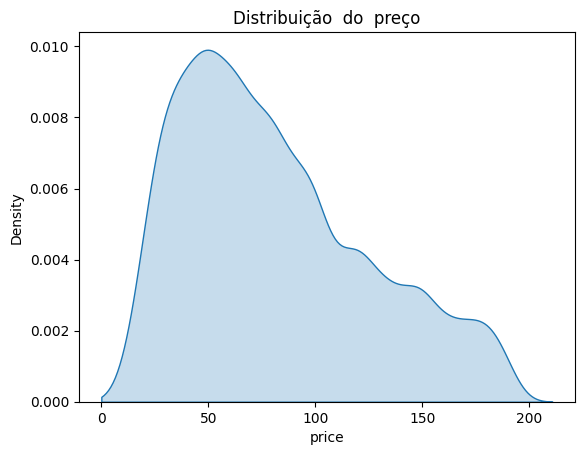

In [ ]:
# Distribuição total do  preço
sns.kdeplot(df_clean.price, shade=True, clip=(0, 300),palette='Greens')
plt.title("Distribuição  do  preço")
fig.show()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
- Um apartamento secundário em Berlim pode ser alugado como apartamento de férias ou acomodação de hóspedes por um máximo de 90 dias por ano. A oferta e publicidade de espaços habitacionais devem ser sempre pré-aprovadas pela repartição distrital responsável.

- Média do mínimo de noites é 48

Media pro noite: 48.1


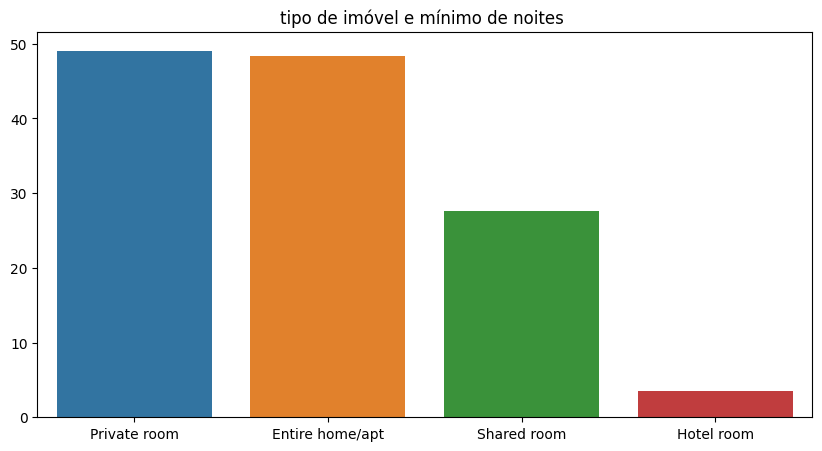

In [ ]:
print('Media pro noite: {:.1f}'.format(df_clean.minimum_nights.mean()))

d = df_clean.groupby('room_type')['minimum_nights'].mean().sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(x=d.index.tolist(), y=d.values, ax=ax)
ax.set_title('tipo de imóvel e mínimo de noites ')
fig.show()

In [ ]:
d

room_type
Private room       49.082621
Entire home/apt    48.415876
Shared room        27.576389
Hotel room          3.460317
Name: minimum_nights, dtype: float64

### **Q8. Qual é o Host que tem mais anúncios ?*

- A Blueground é uma empresa dos Estados Unidos que aluga apartamentos mobiliados.
- Os outros anfitriões parecem ser privados.
- O local com o maior número de anúncios é Kreuzberg, que é uma região central e bem conhecida em Berlim.
- Kreuzberg tem um preço médio de 70 Euros.
- O tipo de aluguel mais oferecido é o Home/apartamento.

In [ ]:
# o hosts que tem mais mais anúncios na plataforma Airbnb
top_host = df_clean.host_name.value_counts().head(10)
#setting figure size for future visualizations
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_name', 'host_name':'P_Count'}, inplace=True)
top_host_df

,Host_name,P_Count
0,Blueground,153
1,Michael,84
2,Daniel,72
3,Anna,66
4,Martin,65
5,Jan,60
6,Julia,58
7,Ukio Germany,56
8,Christian,55
9,Selina,54


In [ ]:
# Qual o Bairro com maior anúncios e ofertas
df= df_clean.groupby('neighbourhood_group').count()
df.id.sort_values(ascending=False)[:10]

neighbourhood_group
Friedrichshain-Kreuzberg    2347
Mitte                       2115
Pankow                      1653
Neukölln                    1392
Charlottenburg-Wilm.         996
Tempelhof - Schöneberg       759
Treptow - Köpenick           450
Lichtenberg                  318
Steglitz - Zehlendorf        272
Reinickendorf                183
Name: id, dtype: int64

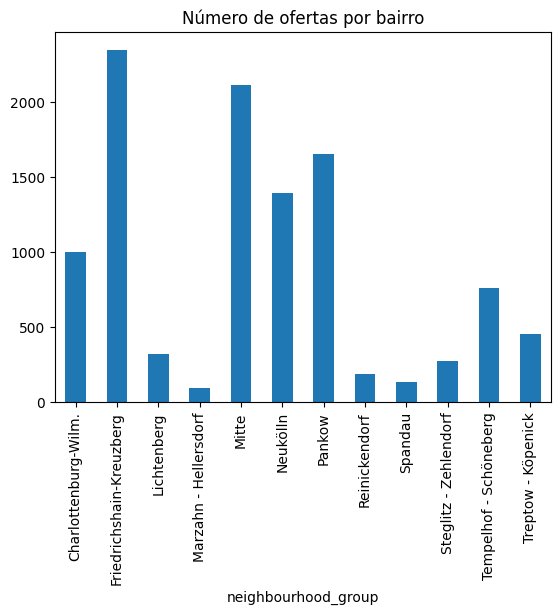

In [ ]:
# Número de ofertas por bairro
df_clean.groupby(by="neighbourhood_group").id.count().plot(kind="bar", title="Número de ofertas por bairro");

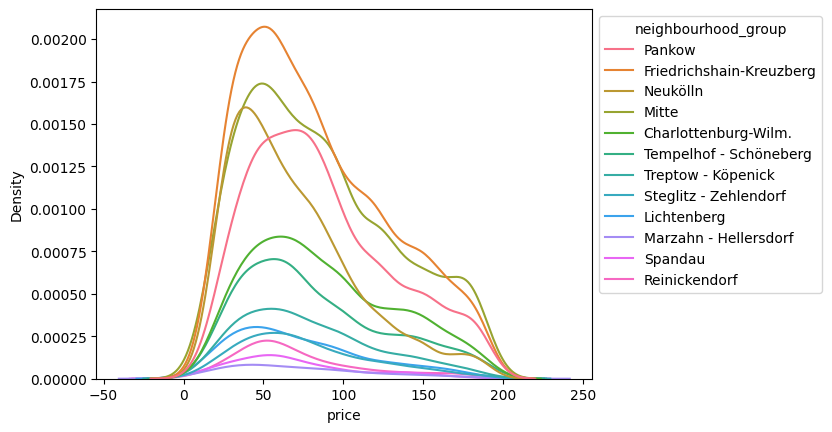

In [ ]:
# Distribuicao dos Bairros por precos
ax = sns.kdeplot(df_clean, x="price", hue="neighbourhood_group")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

##Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

In [ ]:
berlin_lat = df_berlin.latitude.mean()
berlin_long = df_berlin.longitude.mean()
colors = ["#3333DD", "#B00000"]
from folium import plugins
heatmap = folium.Map(location=[berlin_lat, berlin_long], zoom_start=11, tiles='Stamen Toner',)

# plot heatmap
heatmap.add_children(folium.plugins.HeatMap(df_berlin[['latitude', 'longitude']].values, radius=15, cmap='viridis'))
heatmap

## Conclusões



1. O tipo de imóvel mais alugado no Airbnb em Berlim é o Home/apartamento e corresponde a 69% do mercado, seguido pelo aluguel de um quarto, que corresponde a 32% do mercado.

2. O preço médio do apartamento é de 95 euros por dia, enquanto para um quarto pode-se pagar 60 euros.

3. Os bairros com maior oferta são Friedrichshain-Kreuzberg e Mitte. Esses bairros são centrais e turísticos.

4. Kreuzberg tem um preço médio de 70 euros.

5. Também notou-se que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

6. A média do número mínimo de noites para aluguel é de 48 noites. Para hotéis, a média é de 3 noites.

7. A Blueground é uma empresa dos Estados Unidos que aluga apartamentos mobiliados. A Blueground é a maior proprietária de imóveis para alugar no Airbnb.

8. Os outros anfitriões parecem ser privados.



Analisamos esse conjunto de dados de diferentes ângulos e obtivemos insights interessantes. Isso pode ajudar na tomada de decisões estratégicas baseadas em dados pela equipe de marketing, equipe financeira e equipe técnica do Airbnb.


